In [1]:
import numpy as np
import matplotlib.pyplot as plt

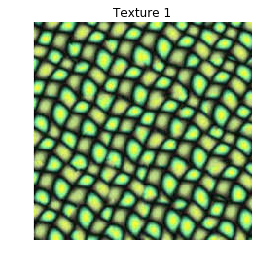

In [2]:
texture_1 = plt.imread('../data/texture1.jpg')

plt.title('Texture 1')
plt.imshow(texture_1)
plt.axis('off')
plt.show()

In [3]:
h, w, c = texture_1.shape

block_size = 75

assert block_size < min(h, w)

h, w, c

(224, 225, 3)

In [4]:
y_max, x_max = h - block_size, w - block_size
y_max, x_max

(149, 150)

In [5]:
# desired size of new image is twice original one
dh = h * 2
dw = w * 2

nx_blocks = ny_blocks = max(dh, dw) // block_size
w_new = h_new = nx_blocks * block_size
print('New image will be %d x %d x %d, composed of %d x %d blocks' % (w_new, h_new, c, nx_blocks, ny_blocks))

New image will be 450 x 450 x 3, composed of 6 x 6 blocks


In [6]:
n_blocks = nx_blocks * ny_blocks
n_blocks

36

In [7]:
texture_img = np.zeros((h_new, w_new, c), dtype=texture_1.dtype)

In [8]:
xs = np.random.randint(0, x_max, size=n_blocks)
ys = np.random.randint(0, y_max, size=n_blocks)
ind = np.vstack((xs, ys)).T

blocks = np.array([texture_1[y:y + block_size, x:x + block_size] for x, y in ind])
blocks.shape

(36, 75, 75, 3)

In [9]:
b = 0
for y in range(ny_blocks):
    for x in range(nx_blocks):
        x1, y1 = x * block_size, y * block_size
        x2, y2 = x1 + block_size, y1 + block_size
        texture_img[y1:y2, x1:x2] = blocks[b]
        b += 1

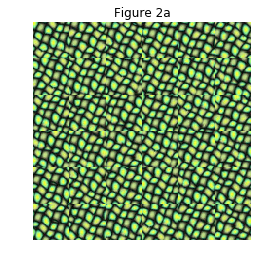

In [10]:
plt.title('Figure 2a')
plt.imshow(texture_img)
plt.axis('off')
plt.show()